# PRACTICA 1 #

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib as mpl

In [29]:
flintstones = np.array(Image.open("1_Introduccion/imagenes_test01/flinstones.png").convert("L"))
peppers = np.array(Image.open("1_Introduccion/imagenes_test01/peppers256.png").convert("L"))
door = np.array(Image.open("1_Introduccion/imagenes1/kodim02.png").convert("L"))
woman = np.array(Image.open("1_Introduccion/imagenes1/kodim04.png").convert("L"))
cupula = np.array(Image.open("1_Introduccion/imagenes_contraste/cupula.jpg").convert("L"))
mamografia = np.array(Image.open("1_Introduccion/imagenes_contraste/manografia.jpg").convert("L"))
seeds = np.array(Image.open("1_Introduccion/imagenes_contraste/seeds.jpg").convert("L"))
aerial = np.array(Image.open("1_Introduccion/imagenes_contraste/aerial.jpg").convert("L"))
golf = np.array(Image.open("1_Introduccion/imagenes1/moonless_golf_1k.png").convert("L"))
aerial = np.array(Image.open("1_Introduccion/imagenes_contraste/aerial.jpg").convert("L"))
barbara = np.array(Image.open("1_Introduccion/imagenes_test01/barbara.png").convert("L"))

## Histograma de niveles de gris

Implementar una función que devuelva el histograma de niveles de gris de una imagen.

In [3]:
def histograma(imagen):
    # Creamos una figura con 2 subplots
    fig, axs = plt.subplots(1, 2, figsize=(8, 4))

    # Primer subplot: Imagen original (escala de grises)
    axs[0].imshow(imagen, cmap='gray', vmin=0, vmax=255)  # Imprimimos imagen, importante el vmin vmax sino PIL la ecualiza.
    axs[0].set_title('Imagen - Grayscale')
    axs[0].axis('scaled')  # Maintain aspect ratio
    axs[0].axis('off')  # Para ocultar los ticks

    # Segundo subplot: Histograma
    hist, bin_edges = np.histogram(imagen.ravel(), 256, [0, 255])
    axs[1].plot(hist)
    axs[1].set_xlim([0, 255])
    axs[1].set_title('Histograma')
    axs[1].set_xlabel('Valor de Pixel')
    axs[1].set_ylabel('Frecuencia')

    plt.tight_layout()
    plt.show()

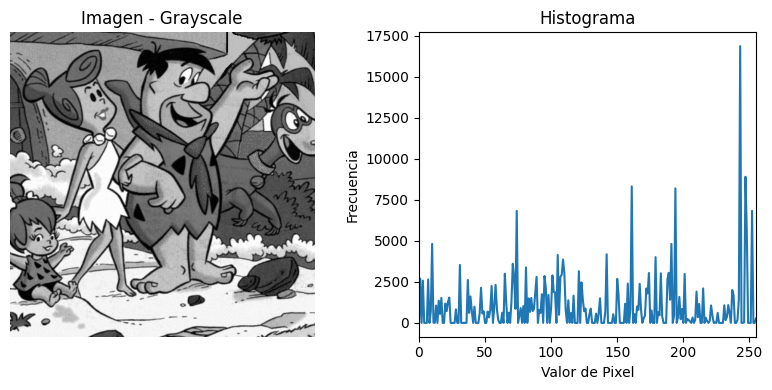

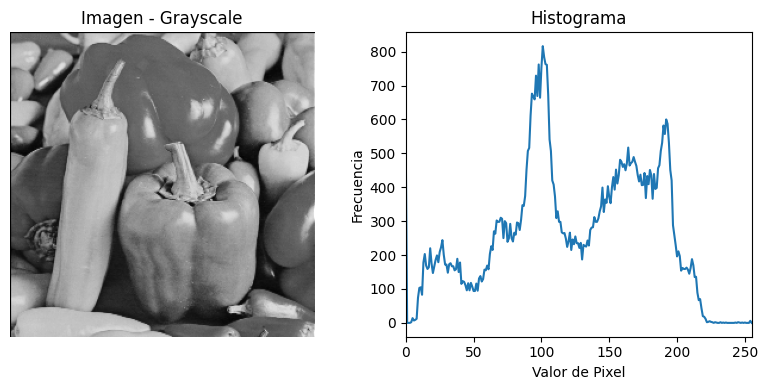

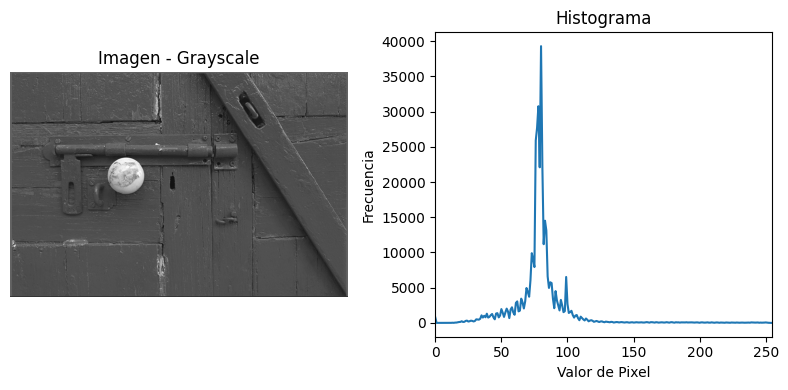

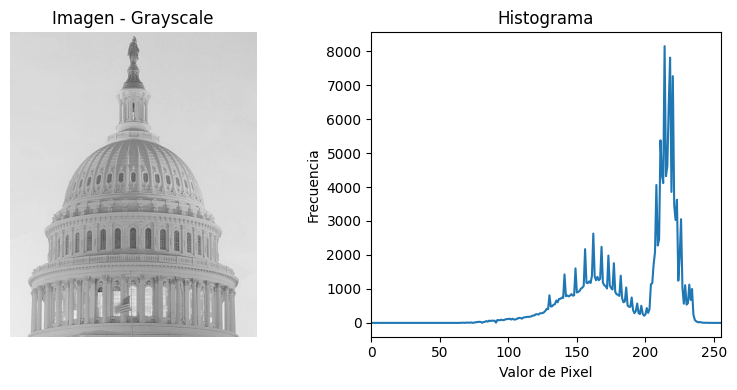

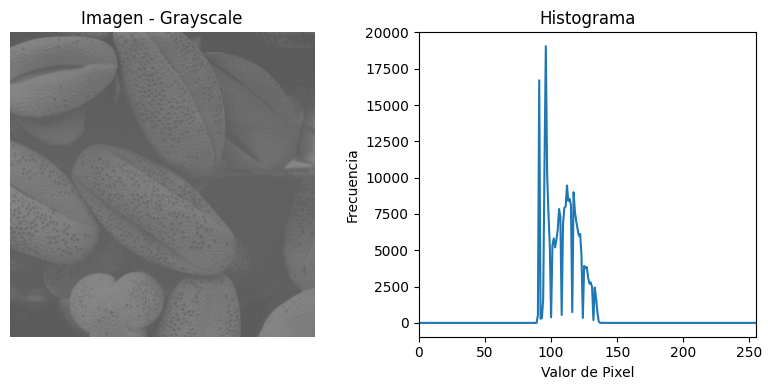

In [4]:
#histograma recibe argumento de tipo PIL.Image
histograma(flintstones)
histograma(peppers)
histograma(door)
histograma(cupula)
histograma(seeds)

## Compresion de Rango Dinamico

Implementar la compresión del rango dinámico: sean *r* el nivel de gris de la imagen de entrada y *s* el nivel de gris de la imagen de salida, tal que $s = f(r), r ∈ [0,R]$. Entonces la función de compresión del rango dinámico es $f(r) = c · log(r + 1)$, eligiendo *c* de manera tal que $f (r) \in [0, 255].$


In [5]:
def compresion_rango(imagen,c):
    imagen_comp = np.log(imagen + 1) * c
    return imagen_comp

### Imagen inicial

Nota: Necesito una imagen oscura para poder aprovechar la compresion de rango dinamico. 

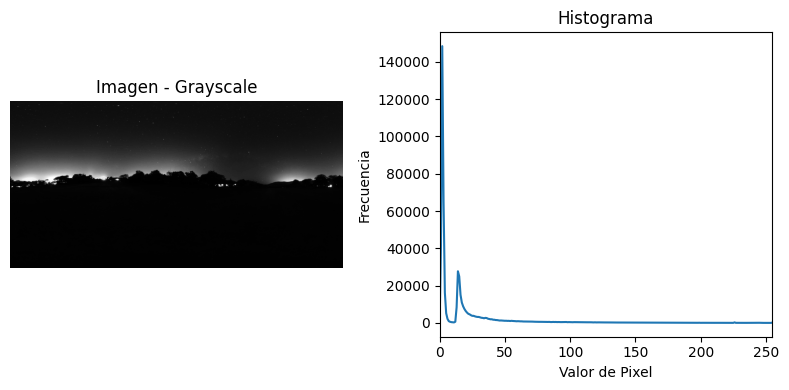

In [6]:
histograma(golf)

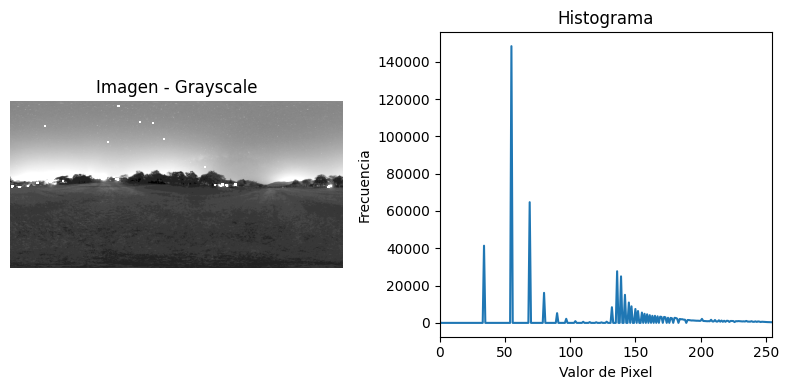

In [7]:
#compresion_rango(np.array,int)
np.seterr(divide = 'ignore') #usamos esto porque da warning de division por 0.
imagen_comprimida = compresion_rango(golf,50)
np.seterr(divide = 'warn') 
histograma(imagen_comprimida)

## Imagen negativa

2. Implementar una función que devuelva el negativo de una imagen.

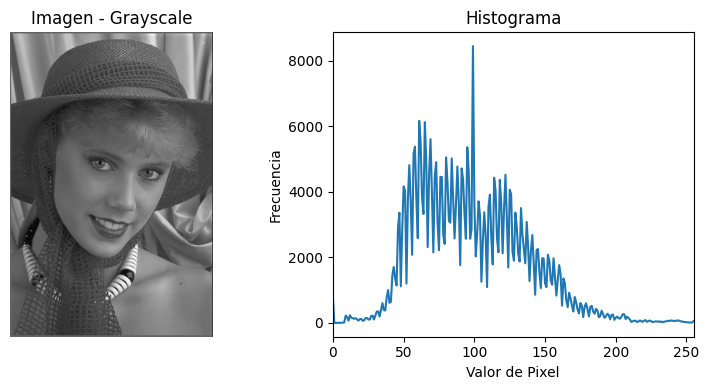

In [8]:
histograma(woman)

In [9]:
def negativa(imagen):
    imagen_negativa = np.array(255 - imagen)
    return imagen_negativa

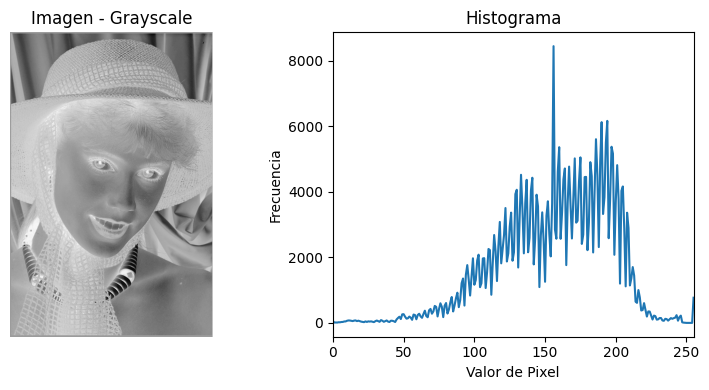

In [10]:
# negativa(np.array)
imagen_negativa = negativa(woman)
histograma(imagen_negativa)

### Aumento de contraste
Examinando el histograma, implementar una función que devuelva una imagen que tenga aumento del contraste.

In [11]:
def aumento_contraste(imagen):
    max = np.max(imagen)
    min = np.min(imagen)
    imagen_contrastada = np.array(imagen)
    imag_contrastada = (imagen - min) * (255 / (max - min))
    return imag_contrastada

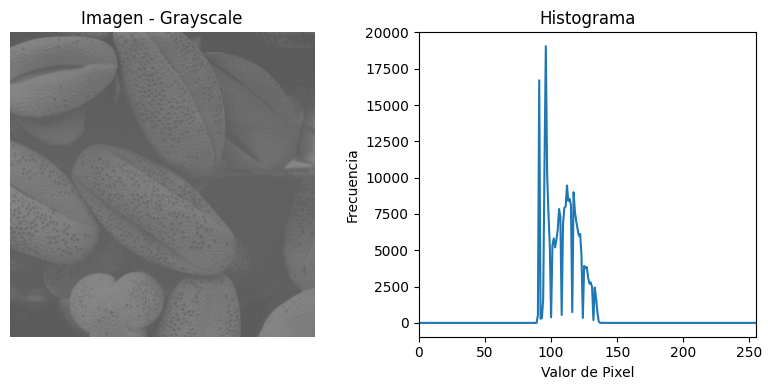

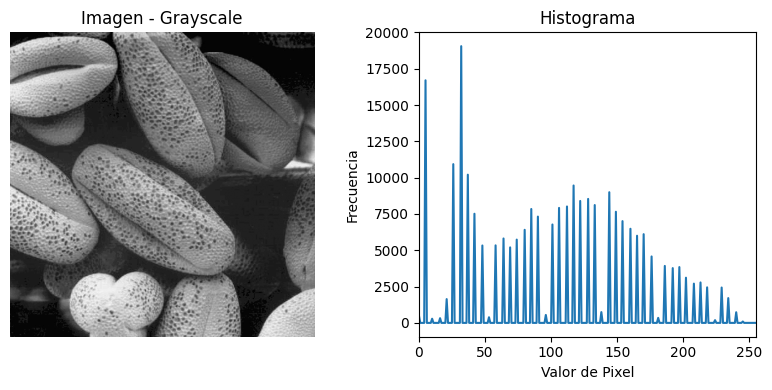

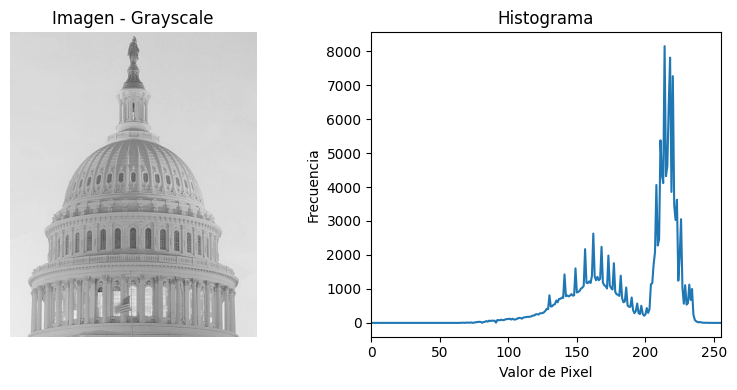

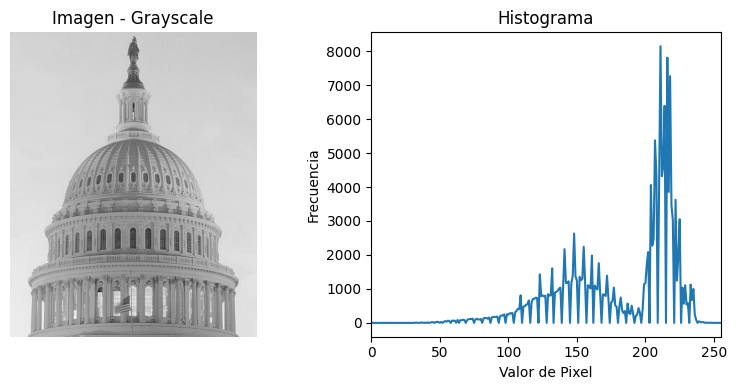

In [12]:
histograma(seeds)
imagen_contrastada = aumento_contraste(seeds)
histograma(imagen_contrastada)
histograma(cupula)
imagen_contrastada = aumento_contraste(cupula)
histograma(imagen_contrastada)

---
### Umbral - Imagen Binaria

Implementar una función que aplique un umbral a una imagen, devolviendo una imagen binaria.

In [13]:
def binaria(imagen):
    umbral = np.mean(imagen)
    bajo_umbral = imagen < umbral
    sobre_umbral = imagen >= umbral
    imagen_binaria = np.array(imagen)
    imagen_binaria[bajo_umbral] = 0
    imagen_binaria[sobre_umbral] = 255
    return imagen_binaria

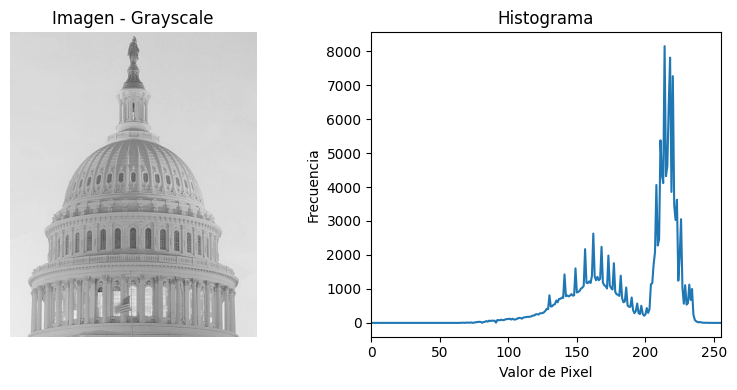

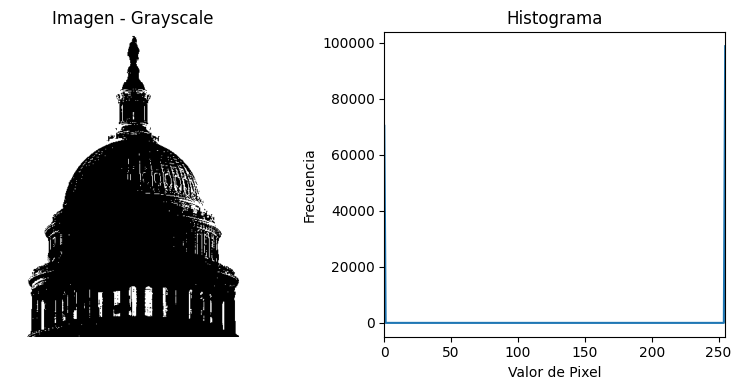

In [14]:
histograma(cupula)
imagen_binaria = binaria(cupula)
histograma(imagen_binaria)

### Ecualizacion

Dada una imagen a la cual se le ecualiz ́o su histograma, aplicar la ecualizaci ́on del histograma por segunda vez a la misma imagen. Observar el resultado y dar una explicaci ́on de lo sucedido.

In [15]:
def ecu(imagen):
    img = np.array(imagen)
    hist, bins = np.histogram(img, bins=256, range=(0, 256))
    fdc = hist.cumsum()  #funcion de distribucion acumulada numpy
    fdc_normalizada = (fdc * 255) / fdc[255]
    ecualizada = fdc_normalizada[img].astype(int)
    return ecualizada

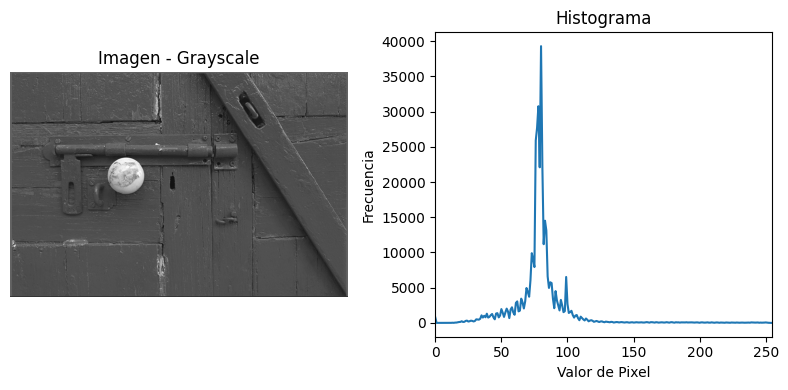

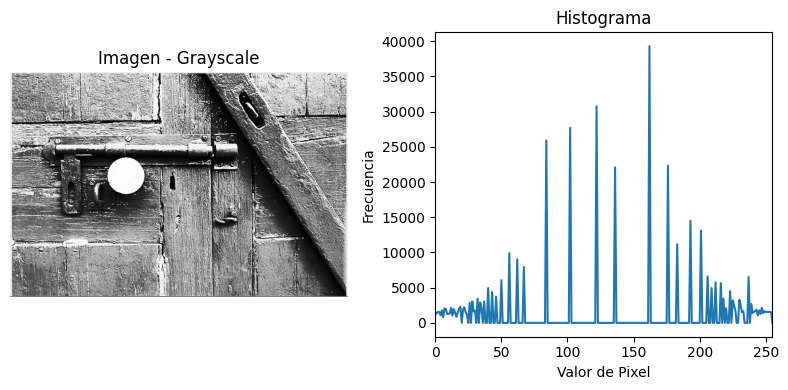

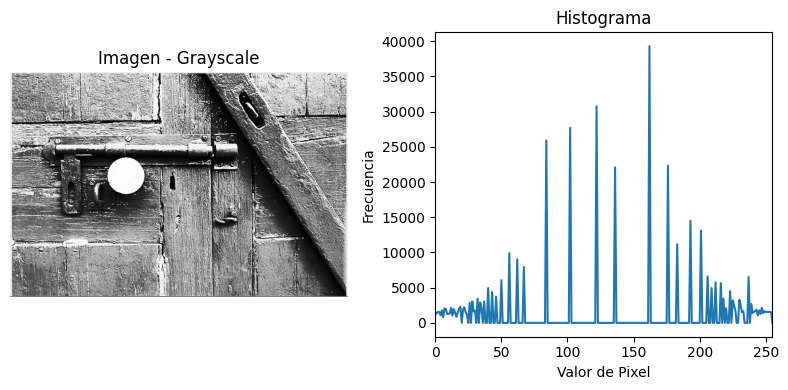

In [16]:
histograma(door)
imagen_ecualizada = ecu(door)
histograma(imagen_ecualizada)
imagen_doble_ecualizada = ecu(imagen_ecualizada)
histograma(imagen_doble_ecualizada)

## Modificacion de histograma resolviendo el problema de minimización.

$he = ((1 + λ)I + γD^{t}D)^{-1}(h_{0} + λu)$


$I$ = Matriz identidad, $I \in R^{256x256}$

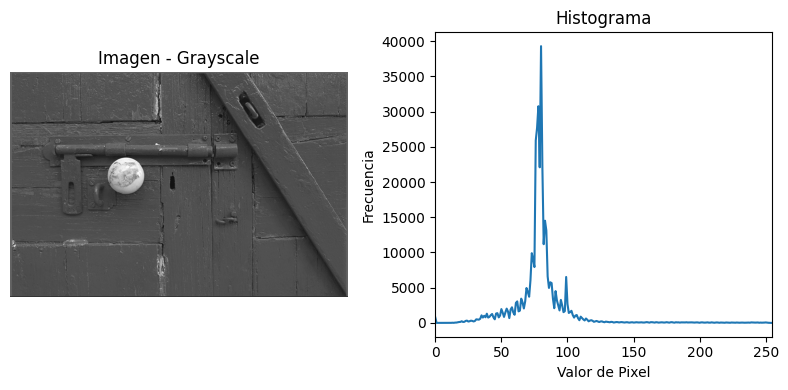

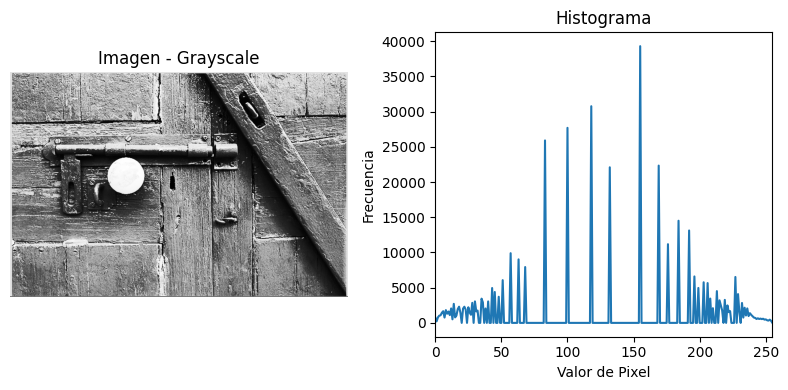

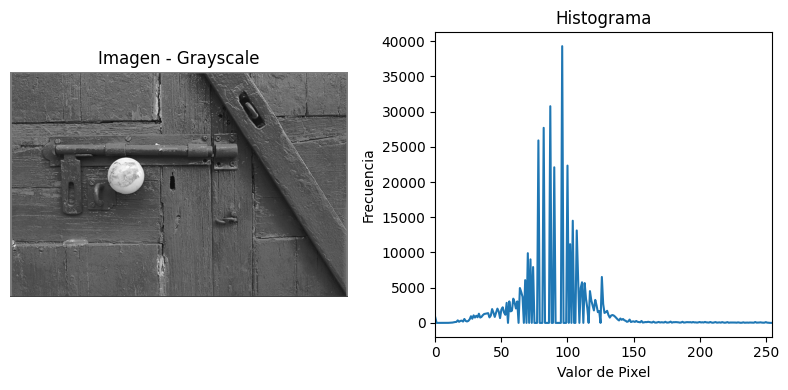

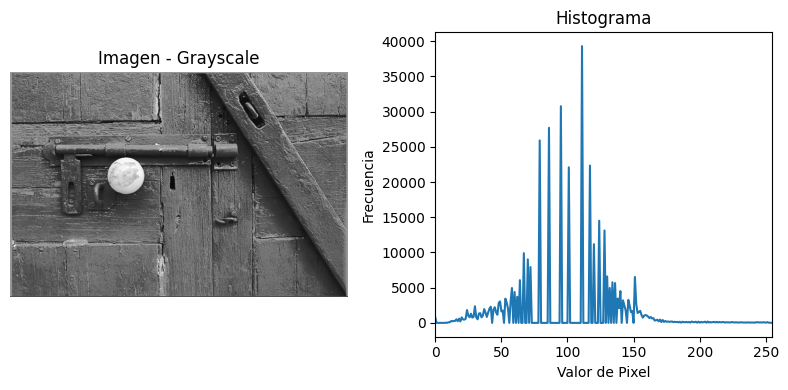

In [17]:
from scipy import sparse

def minimizacion(lamda, gamma, imagen):
    img = np.array(imagen)
    matriz_identidad = np.identity(256)
    diag1 = np.ones(256, dtype=np.int8)
    diag2 = np.negative(diag1)
    diagonales = [diag1, diag2]
    matriz_diferencias = sparse.diags(diagonales, [0, 1],dtype=np.int8).toarray()
    matriz_diferencias_transpuesta = matriz_diferencias.transpose()
    prod_mat_dif = np.matmul(matriz_diferencias,matriz_diferencias_transpuesta)
    arg1 = np.linalg.inv((1+lamda)*matriz_identidad+gamma*prod_mat_dif)
    hist_uniforme = np.random.uniform(low=128, high=128,size=256) 
    img = np.array(imagen)
    hist, bins = np.histogram(img, bins=256, range=(0, 256))
    hist2 = hist+hist_uniforme*lamda
    he = hist2*arg1
    fdc = hist2.cumsum()  #funcion de distribucion acumulada numpy
    fdc_normalizada = (fdc * 255) / fdc[255]
    ecualizada = fdc_normalizada[img].astype(int)
    return ecualizada

histograma(door)
minimizada = minimizacion(1,0,door)
histograma(minimizada)
minimizada = minimizacion(50,100,door)
histograma(minimizada)
minimizada = minimizacion(20,5,door)
histograma(minimizada)

## Práctica 2

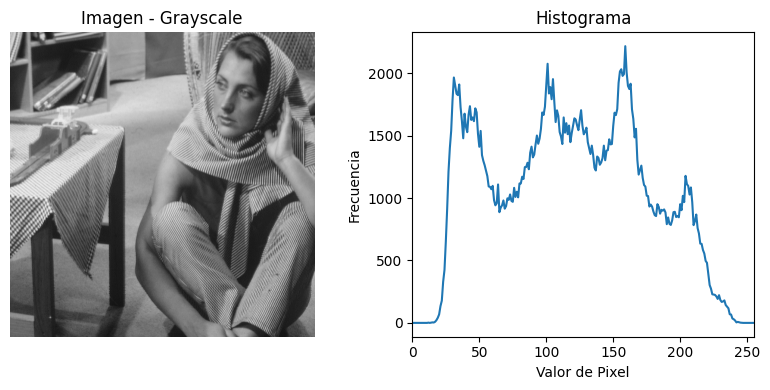

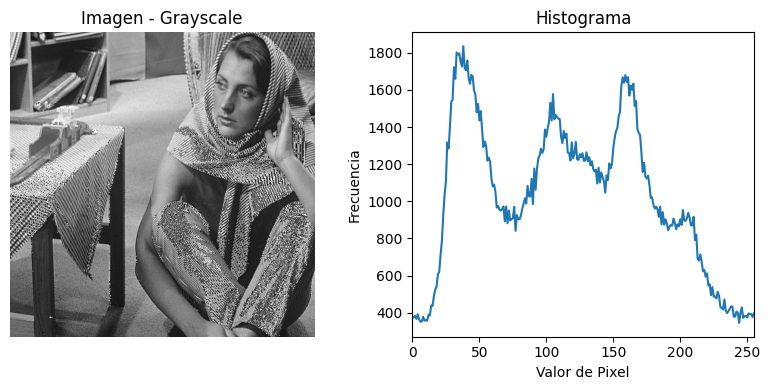

In [42]:
from scipy.ndimage import gaussian_filter

histograma(barbara)

def unsharp_masking(imagen, sig,a):
    I = imagen
    I_blur = gaussian_filter(imagen, sigma=sig)
    Mask = I - I_blur
    return I + Mask*a

sharped = unsharp_masking(barbara,1,2)
histograma(sharped)